In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from matplotlib import rcParams
from tensorflow.keras.callbacks import EarlyStopping

/hpc/applications/anaconda/3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/hpc/applications/anaconda/3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/hpc/applications/anaconda/3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/hpc/applications/anaconda/3/lib/python3.6/site-packages/tensorf

In [2]:
df = pd.read_csv('all_train.csv.gz', compression='gzip')
df

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.000000
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.000000
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.000000
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.000000
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999995,0.0,1.617264,-0.537084,-1.275867,0.650799,-1.511621,0.850488,0.596391,-0.054678,0.728849,...,0.664328,-0.960709,-0.894011,1.743123,-0.426198,-0.324286,-0.432739,1.340297,0.267774,750.000000
6999996,0.0,-0.511357,0.270927,0.085989,-0.243802,-1.035668,-0.005984,-0.127219,0.721426,1.404479,...,-1.015462,1.367217,-1.053815,-0.573682,-1.907798,0.194661,-0.190621,0.027776,-0.316018,1250.000000
6999997,1.0,0.062408,-0.987203,0.570667,1.517195,0.639548,-1.054221,1.115239,1.261928,-1.009308,...,0.790842,0.892545,-0.192816,-0.573682,0.973622,1.034964,-0.340661,-0.181193,1.877042,1500.000000
6999998,1.0,1.659131,1.096223,0.562821,1.627193,0.767236,-1.054221,1.079999,0.155488,-1.412207,...,-0.671423,-0.308908,-0.568336,-0.573682,1.043119,1.270350,0.217405,0.120213,1.073020,1500.000000


In [3]:
df.describe()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,...,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,5.001256e-01,1.612528e-02,4.770022e-04,2.686578e-05,1.056081e-02,-1.050026e-04,2.765919e-03,1.815953e-02,2.510948e-05,4.345870e-04,...,1.164789e-02,-1.127097e-04,7.686731e-05,2.909202e-04,1.228774e-02,9.778378e-03,5.269844e-03,-1.760961e-03,1.533136e-02,1.000107e+03
std,5.000000e-01,1.004417e+00,9.974864e-01,1.000080e+00,9.956003e-01,9.998670e-01,1.000957e+00,9.867746e-01,9.965867e-01,1.000007e+00,...,1.002725e+00,1.000038e+00,1.000033e+00,1.000170e+00,1.010477e+00,1.005418e+00,1.009990e+00,9.844511e-01,9.822799e-01,3.534255e+02
min,0.000000e+00,-1.960549e+00,-2.365355e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757853e+00,-1.732359e+00,...,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-3.452634e+00,-2.632761e+00,5.000000e+02
25%,0.000000e+00,-7.288206e-01,-7.332548e-01,-8.656704e-01,-6.092291e-01,-8.658025e-01,-1.054221e+00,-7.566092e-01,-7.014146e-01,-8.656543e-01,...,-7.423630e-01,-7.206846e-01,-8.656855e-01,-5.736825e-01,-5.417942e-01,-5.115522e-01,-3.543870e-01,-6.925097e-01,-7.943804e-01,7.500000e+02
50%,1.000000e+00,-3.930319e-02,8.523957e-04,3.199154e-04,1.963316e-02,-5.070131e-04,-5.983562e-03,-1.499527e-01,-1.067553e-04,1.384781e-03,...,-8.992496e-02,-6.735953e-05,-4.424527e-04,-5.736825e-01,-1.602760e-01,-3.144032e-01,-3.265228e-01,-3.570301e-01,-8.828640e-02,1.000000e+03
75%,1.000000e+00,6.900799e-01,7.347832e-01,8.659464e-01,6.798818e-01,8.657646e-01,8.504885e-01,7.686690e-01,7.013194e-01,8.665976e-01,...,6.423185e-01,7.204921e-01,8.659566e-01,-5.736825e-01,4.812194e-01,1.634892e-01,-2.337671e-01,4.753128e-01,7.610846e-01,1.250000e+03
max,1.000000e+00,4.378282e+00,2.365287e+00,1.732370e+00,4.148023e+00,1.731978e+00,4.482618e+00,3.720345e+00,2.758590e+00,1.731450e+00,...,5.866367e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.293420e+00,9.333287e+00,1.499064e+01,5.277313e+00,4.444690e+00,1.500000e+03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 29 columns):
# label    float64
f0         float64
f1         float64
f2         float64
f3         float64
f4         float64
f5         float64
f6         float64
f7         float64
f8         float64
f9         float64
f10        float64
f11        float64
f12        float64
f13        float64
f14        float64
f15        float64
f16        float64
f17        float64
f18        float64
f19        float64
f20        float64
f21        float64
f22        float64
f23        float64
f24        float64
f25        float64
f26        float64
mass       float64
dtypes: float64(29)
memory usage: 1.5 GB


In [5]:
df.isnull().values.any()

False

Text(0.5,1,'Distribution of Target Value')

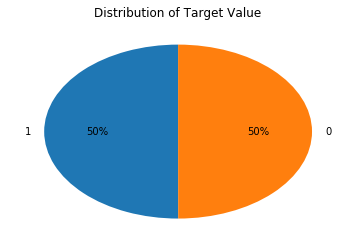

In [6]:
valueCounts = df['# label'].value_counts()
color = sns.color_palette('tab10')

plt.pie(valueCounts, colors = color, autopct='%.0f%%', labels = ['1', '0'], startangle = 90)
plt.title("Distribution of Target Value")

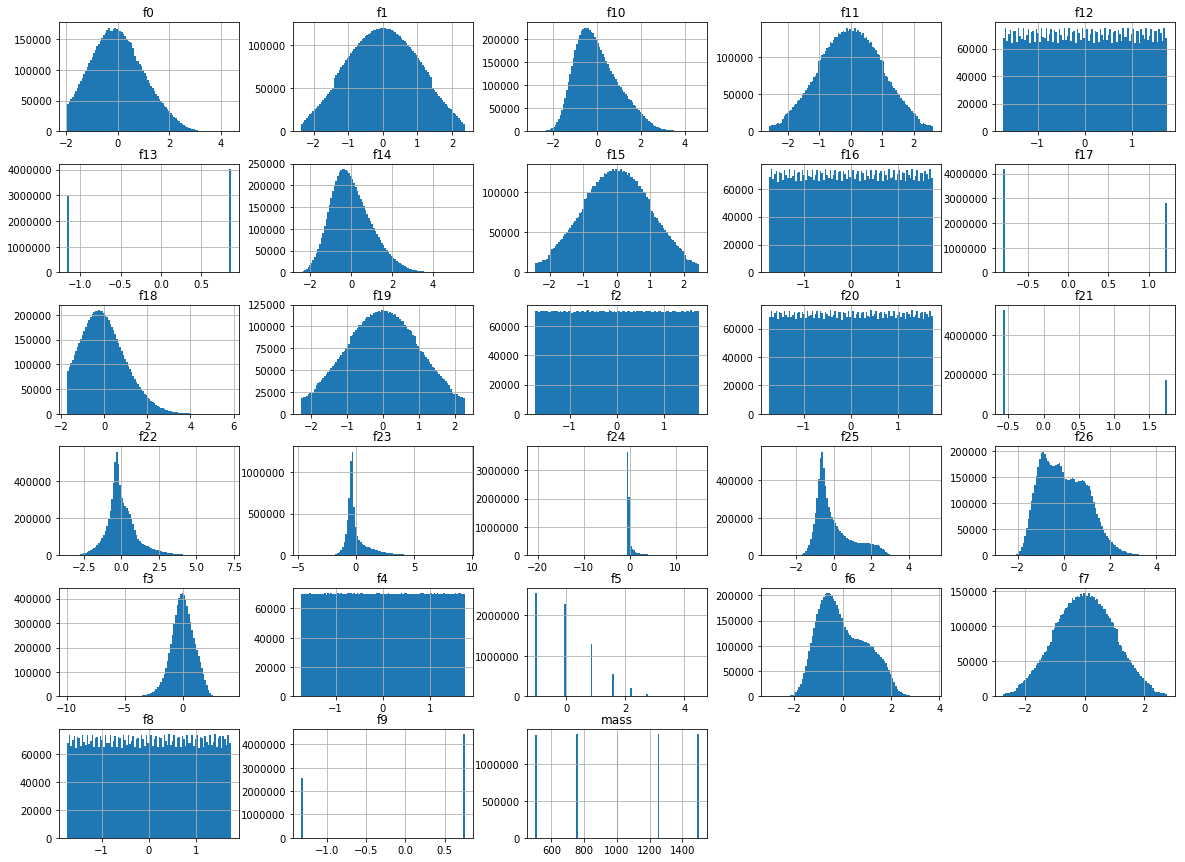

In [7]:
df1 = df.drop(['# label'], axis = 1)

df1.hist(bins=100, figsize = (20,15))
plt.show()

Text(0.5,1,'Corrleation Heatmap')

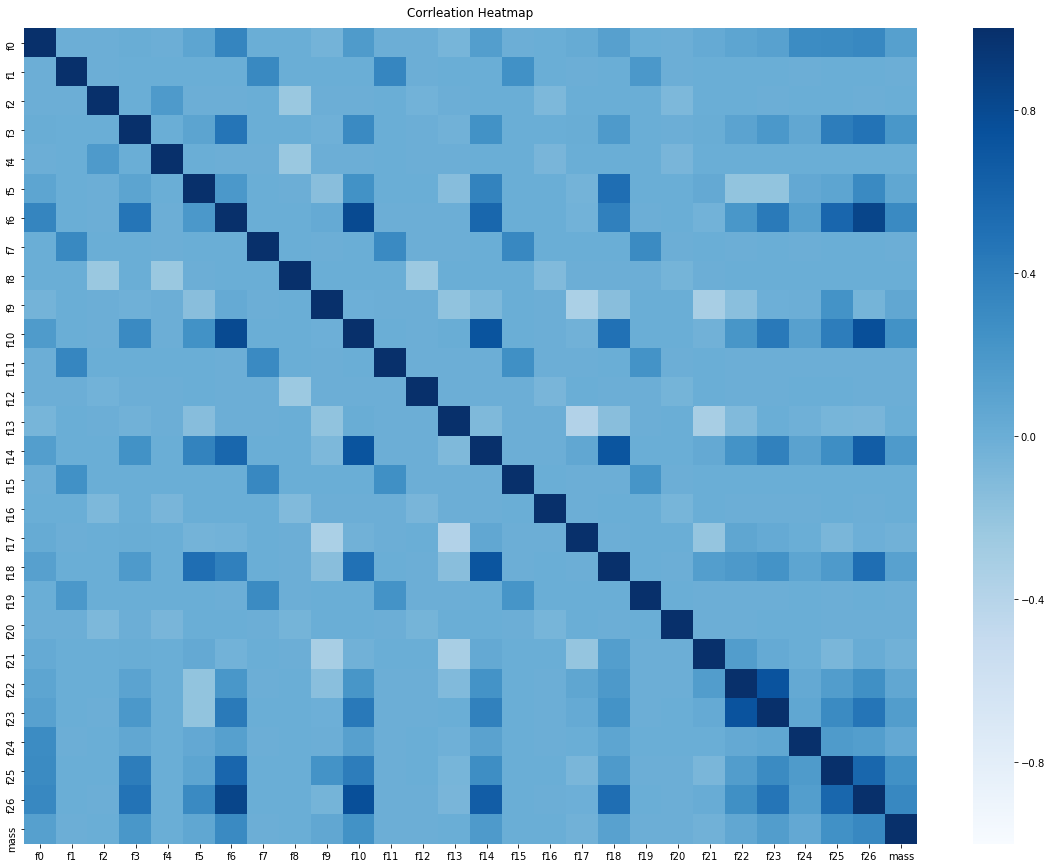

In [8]:
plt.figure(figsize=(20,15))

heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=False, cmap = 'Blues')
heatmap.set_title('Corrleation Heatmap', fontdict={'fontsize':12}, pad=12)

In [9]:
# https://chrisalbon.com/code/machine_learning/feature_selection/drop_highly_correlated_features/

corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

[]

In [10]:
columns = ['f5', 'f9', 'f13', 'f17', 'f21', 'mass']

for i in columns:
    print("Unique values for Column {} are {}".format(i, df[i].unique()))

Unique values for Column f5 are [-0.00598356 -1.0542208   1.57462549  0.85048848  2.2019012   2.75519776
  3.25013828  3.69786668  4.1066103   4.48261786]
Unique values for Column f9 are [ 0.75426072 -1.32580137]
Unique values for Column f13 are [-1.16191471  0.86064863]
Unique values for Column f17 are [-0.81544012  1.22633111]
Unique values for Column f21 are [ 1.74312329 -0.57368249]
Unique values for Column mass are [1000.          750.         1250.          499.99996948 1500.        ]


In [11]:
df2 = pd.get_dummies(df, columns=['f9', 'f13', 'f17', 'f21'], prefix=['f9', 'f13', 'f17', 'f21'])
df2

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f26,mass,f9_-1.325801372528076,f9_0.7542607188224792,f13_-1.1619147062301634,f13_0.8606486320495604,f17_-0.8154401183128357,f17_1.226331114768982,f21_-0.5736824870109559,f21_1.7431232929229734
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,2.227706,1000.000000,0,1,1,0,1,0,0,1
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-0.193019,750.000000,0,1,1,0,0,1,1,0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.506304,750.000000,0,1,1,0,0,1,1,0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.529698,1250.000000,0,1,0,1,1,0,1,0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-1.023889,750.000000,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999995,0.0,1.617264,-0.537084,-1.275867,0.650799,-1.511621,0.850488,0.596391,-0.054678,0.728849,...,0.267774,750.000000,0,1,1,0,1,0,0,1
6999996,0.0,-0.511357,0.270927,0.085989,-0.243802,-1.035668,-0.005984,-0.127219,0.721426,1.404479,...,-0.316018,1250.000000,1,0,0,1,0,1,1,0
6999997,1.0,0.062408,-0.987203,0.570667,1.517195,0.639548,-1.054221,1.115239,1.261928,-1.009308,...,1.877042,1500.000000,0,1,0,1,1,0,1,0
6999998,1.0,1.659131,1.096223,0.562821,1.627193,0.767236,-1.054221,1.079999,0.155488,-1.412207,...,1.073020,1500.000000,1,0,0,1,0,1,1,0


In [12]:
X = df2.drop(['# label'], axis = 1)
y = df2['# label']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 12)
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12)

In [15]:
# tf.random.set_seed(12)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, input_shape=(32,), activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.compile(
    optimizer='adadelta',
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               16896     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 214,273
Trainable params: 214,273
Non-trainable params: 0
_________________________________________________________________


In [18]:
stops = EarlyStopping(monitor='val_loss', patience=3, min_delta=1e-5)

model_fit = model.fit(x_train, y_train,
                      validation_data=(x_val, y_val),
                      epochs=1000,
                      batch_size=10000,
                      callbacks=[stops])

Train on 4480000 samples, validate on 1120000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
4480000/4480000 [==============================] - 33s 7us/sample - loss: 0.3172 - accuracy: 0.8515 - precision: 0.8341 - recall: 0.8775 - val_loss: 0.2904 - val_accuracy: 0.8648 - val_precision: 0.8418 - val_recall: 0.8991
Epoch 2/1000
4480000/4480000 [==============================] - 33s 7us/sample - loss: 0.2884 - accuracy: 0.8663 - precision: 0.8476 - recall: 0.8931 - val_loss: 0.2852 - val_accuracy: 0.8687 - val_precision: 0.8722 - val_recall: 0.8647
Epoch 3/1000
4480000/4480000 [==============================] - 33s 7us/sample - loss: 0.2818 - accuracy: 0.8705 - precision: 0.8532 - recall: 0.8951 - val_loss: 0.2809 - val_accuracy: 0.8711 - val_precision: 0.8367 - val_recall: 0.9230
Epoch 4/1000
4480000/4480000 [==============================] - 32s 7us/sample - loss: 0.2775 - accuracy: 0.8735 - precision: 0.8564 - recall: 0.8973 - val_loss: 0.2744 - val_accuracy: 0.

In [19]:
rcParams['figure.figsize'] = (10, 5)
rcParams['lines.linewidth'] = 3
rcParams['font.size']=14
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

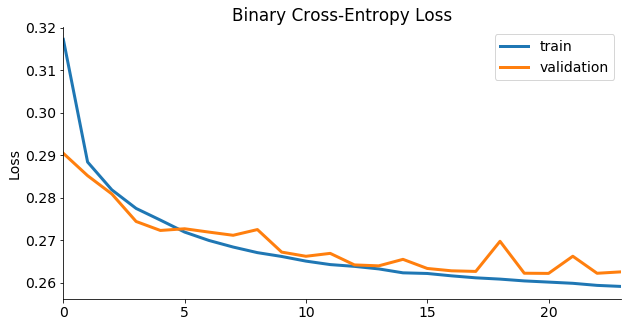

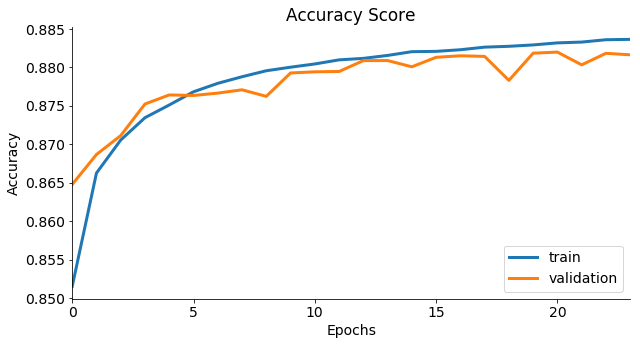

In [20]:
history_df = pd.DataFrame(model_fit.history)
history_df[['loss', 'val_loss']].plot()
plt.title('Binary Cross-Entropy Loss')
plt.ylabel('Loss')
plt.legend(['train','validation'])

history_df = pd.DataFrame(model_fit.history)
history_df[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy Score')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'], loc='lower right')

In [21]:
pred=model.predict_classes(X_test)

In [22]:
pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int32)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88    699977
         1.0       0.86      0.92      0.89    700023

    accuracy                           0.88   1400000
   macro avg       0.88      0.88      0.88   1400000
weighted avg       0.88      0.88      0.88   1400000



In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8821357142857142

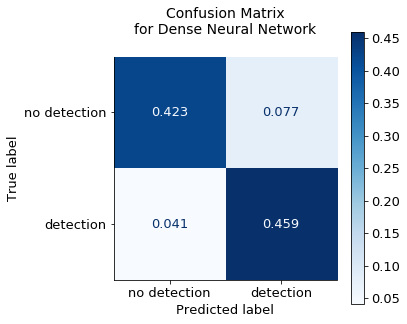

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, normalize='all')
cm = cm.round(decimals=3)

font = {'size'   : 13}
plt.rc('font', **font)

c_disp = ConfusionMatrixDisplay(cm, display_labels=np.asarray(['no detection','detection']))
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
plt.title('Confusion Matrix\nfor Dense Neural Network\n', fontsize=14)
c_disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='')

In [55]:
pred.shape

(1400000, 1)

In [56]:
np.unique(y_test, axis=0, return_counts=True)

(array([0., 1.]), array([699977, 700023]))

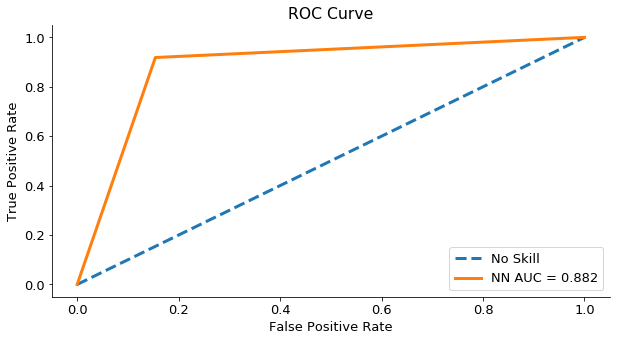

In [26]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

roc_log = roc_auc_score(y_test, pred)
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, pred)
area_under_curve = auc(false_positive_rate, true_positive_rate)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(false_positive_rate, true_positive_rate, label='NN AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
# plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
plt.legend(loc=4)

In [50]:
with pd.option_context('display.max_rows', 513):
    display(pd.DataFrame(model.get_weights()[0]))

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.067662,-0.068323,-0.070169,-0.038837,0.094822,-0.019976,-0.045922,-0.064602,0.011318,-0.009028,...,0.164209,-0.047210,0.026877,0.000766,-0.080972,0.034438,-0.029172,0.118470,0.071245,-0.036732
1,0.066170,-0.071748,0.082533,-0.051738,-0.063036,-0.046134,-0.020362,0.012293,-0.048814,0.007597,...,-0.119149,-0.061150,-0.138804,-0.019487,-0.063066,0.020312,-0.037809,0.172439,0.020830,0.068519
2,0.036800,-0.002345,0.000116,0.056502,-0.004809,-0.044658,0.006738,0.000093,-0.028738,0.010473,...,0.002489,-0.049434,0.044069,-0.003759,-0.017808,-0.016945,-0.031367,0.004700,-0.021462,-0.063753
3,0.006327,-0.013142,-0.004254,-0.083919,0.026446,-0.043732,-0.051576,-0.053911,-0.007387,0.010275,...,0.009216,-0.031152,0.028080,0.069140,-0.033064,0.476203,0.015412,-0.042868,0.105723,-0.085438
4,0.019205,0.009618,0.039862,0.041906,-0.011417,0.016538,-0.084847,-0.023148,0.008094,0.000161,...,-0.003381,-0.027391,-0.017797,-0.012445,-0.024158,-0.012468,-0.018520,-0.043669,0.013439,0.025530
5,-0.031701,-0.016782,0.003558,0.061010,0.038307,0.062898,0.035523,-0.050806,0.066029,-0.186674,...,-0.001279,0.000494,-0.004095,-0.111384,-0.031990,0.027560,-0.104211,-0.020587,-0.005480,-0.091962
6,-0.041838,0.174129,-0.138547,-0.071075,-0.010129,0.047483,0.002816,0.289031,0.062916,-0.049931,...,0.022895,-0.043032,-0.062521,0.031861,-0.081035,-0.127062,-0.062857,-0.090243,0.126898,-0.115318
7,-0.047056,0.034932,-0.059856,0.243807,-0.065069,-0.160741,-0.058074,0.006940,-0.030623,0.000325,...,0.009852,-0.023222,0.110143,0.010844,-0.030610,-0.044484,-0.135095,0.114110,-0.035222,0.051605
8,-0.031624,0.023226,-0.024434,-0.094000,0.036521,-0.075065,0.050307,-0.004334,-0.005603,-0.012149,...,-0.011214,-0.046760,-0.017076,0.040605,-0.025002,-0.019171,-0.009208,-0.029151,-0.026372,0.023166
9,0.020002,-0.081846,-0.133594,-0.110761,-0.052932,0.110725,0.065883,-0.075738,0.020676,0.066348,...,0.016247,0.015978,0.068734,-0.015538,-0.087440,-0.079188,0.081890,0.137625,0.002365,0.096798


In [51]:
with pd.option_context('display.max_rows', 513):
    display(pd.DataFrame(model.get_weights()[2]))

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.041730,-0.061747,-0.020574,-0.027072,0.058267,0.079470,-0.052490,-0.063179,0.056620,-0.019302,...,-0.076062,-0.065298,-0.071483,-0.003533,-0.019552,0.042147,0.073672,-0.102075,-0.149017,0.058570
1,0.031279,0.037118,-0.089752,0.006767,0.022767,0.038434,-0.078623,-0.040881,0.044659,-0.083902,...,0.047013,-0.071095,0.003548,0.055329,-0.045836,-0.021843,-0.086543,0.078481,0.034098,-0.041390
2,-0.075450,-0.044998,-0.088917,0.035503,-0.015016,0.096237,-0.064051,-0.053637,0.076590,-0.017906,...,-0.018153,-0.022240,0.033134,-0.025510,-0.010654,-0.042990,0.049921,-0.049965,0.024393,-0.021637
3,-0.054837,-0.110366,0.061555,-0.047622,-0.050491,-0.074118,0.017460,0.016909,-0.055891,-0.035052,...,-0.055844,0.024154,-0.127630,0.022077,-0.001330,-0.003124,0.047028,-0.138194,-0.074660,-0.023607
4,0.037151,-0.018415,-0.074701,0.042561,0.033148,0.000174,0.060788,0.007161,-0.044937,0.091118,...,-0.044194,-0.039093,-0.020393,0.089463,-0.033766,-0.007301,-0.032297,0.045261,0.012647,0.045438
5,0.027662,0.078707,0.070988,-0.023270,-0.041749,0.020907,0.060517,0.051367,-0.063153,0.060871,...,0.098609,-0.018628,-0.022741,-0.104163,-0.014388,0.006343,0.063747,-0.030795,0.002454,0.064660
6,0.067678,-0.075236,0.003719,-0.041202,-0.004441,0.074584,-0.050114,0.052715,-0.073942,-0.009367,...,-0.000338,0.048932,-0.054765,-0.013050,-0.000683,-0.063327,0.054884,-0.040992,-0.104166,0.025801
7,0.020864,0.072926,0.055781,0.068645,0.093371,-0.008220,0.034726,0.059004,0.079436,-0.069703,...,0.054275,0.032479,-0.057810,0.014440,-0.006928,0.071567,-0.087379,-0.068928,0.113292,0.095393
8,-0.043298,-0.027057,-0.089920,-0.052061,0.100485,-0.032908,-0.057043,-0.081397,0.007077,-0.044709,...,-0.073952,-0.031094,-0.022451,-0.021275,0.081397,-0.034797,0.068039,-0.091851,0.014514,-0.018530
9,0.032033,-0.067189,-0.020685,-0.090518,-0.028175,0.020775,0.035038,-0.063727,-0.061851,0.001372,...,0.043970,0.044947,-0.049882,-0.096433,0.009641,0.049716,-0.007606,-0.026413,-0.006107,-0.034586


In [52]:
with pd.option_context('display.max_rows', 513):
    display(pd.DataFrame(model.get_weights()[4]))

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.103287,-0.057225,-0.009595,-0.050609,0.057209,-0.042623,-0.033715,0.000557,0.001930,-0.096895,...,-0.019298,-0.109780,0.062658,-0.083062,0.106356,0.021065,-0.089245,0.065774,-0.097944,0.049713
1,0.051919,-0.038042,0.042634,0.018536,0.043782,0.035063,0.017391,-0.030733,-0.078442,0.099426,...,-0.012955,-0.044109,-0.019950,0.014849,-0.083006,-0.107370,-0.013008,0.065957,-0.068876,0.051692
2,-0.071130,0.062431,-0.070659,-0.065977,-0.074138,-0.008396,0.041801,-0.040581,-0.102245,0.108990,...,-0.061773,-0.003217,0.079662,0.096781,0.093854,0.008694,0.028901,0.087599,0.002554,-0.103851
3,-0.029083,-0.085257,-0.048267,0.112495,0.063369,-0.070979,-0.057234,-0.025126,0.058306,0.093036,...,-0.073170,0.076467,0.007162,-0.084164,-0.105417,-0.017075,0.097339,-0.009084,0.074305,-0.075215
4,0.071082,0.032666,0.077066,-0.088027,-0.075676,-0.002449,-0.087584,0.016323,-0.093316,0.089132,...,0.073338,-0.009686,0.093524,-0.025176,0.072572,0.056985,-0.086203,0.076004,-0.027318,0.022007
5,0.066641,-0.101225,0.095116,-0.084903,0.052401,0.032069,0.081778,0.018290,0.036896,-0.016047,...,0.079433,0.096599,0.047462,0.058642,-0.031447,0.004358,0.031796,-0.032794,0.020087,0.066709
6,0.074079,-0.031782,0.043187,-0.075617,0.017072,0.070741,0.077425,0.077042,-0.033714,0.089553,...,0.037128,0.059887,-0.085404,-0.050984,-0.061795,0.087774,0.001231,-0.039180,-0.084662,-0.084048
7,0.050766,0.007670,-0.046866,-0.055121,0.013153,-0.088718,-0.076842,0.021145,-0.070410,0.003431,...,0.061022,-0.013039,-0.003169,0.078608,0.015570,0.017344,-0.067981,0.088909,0.076774,-0.104415
8,-0.005290,-0.038087,0.081634,0.029442,-0.029331,0.026178,-0.034401,-0.058017,-0.042057,-0.007843,...,-0.005624,0.070814,-0.114055,0.089982,-0.088955,-0.104817,-0.032375,0.077850,-0.043464,0.055930
9,0.043919,0.030575,0.043256,0.041196,-0.024378,0.077276,0.003146,0.040573,-0.019321,0.075837,...,0.028627,0.093387,0.005296,0.069737,0.007274,-0.004329,-0.011106,-0.101888,-0.039101,-0.006893


In [53]:
pd.DataFrame(model.get_weights()[5])

,0
0,0.001409
1,0.013297
2,-0.070528
3,0.048050
4,0.029086
5,-0.031496
6,0.008562
7,-0.024906
8,-0.057229
9,0.031991
